## Importing packages

In [5]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Loading data

In [8]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data preprocessing

### Removing irrelavant columns

In [9]:
train_data=train_data.drop(['id'],axis=1)
test_data=test_data.drop(['id'],axis=1)
train_data=train_data.drop(['Unnamed: 0'],axis=1)
test_data=test_data.drop(['Unnamed: 0'],axis=1)

In [208]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

#### Since the count of null valued rows in both train and test datasets is low , hence we can drop the rows having null values 

In [11]:
train_data = train_data.dropna()
test_data = test_data.dropna()

#### Making the data type of all numerical columns as int

In [12]:
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].apply(np.int64)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].apply(np.int64)

# Exploratory data analysis

### Checking whether class imbalance is present in data 

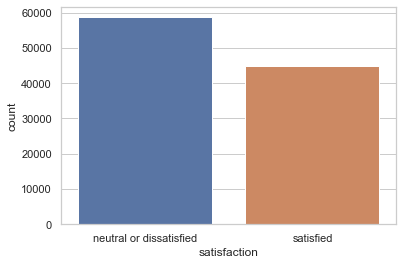

In [15]:
# frequency plot of target variable in train data
ax = sns.countplot(x="satisfaction", data=train_data);

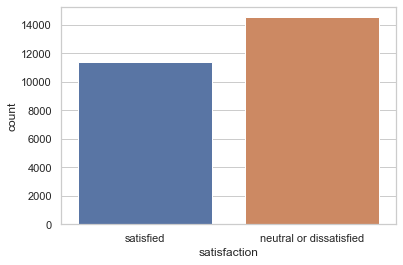

In [14]:
# frequency plot of target variable in test data
ax = sns.countplot(x="satisfaction", data=test_data);

#### We saw that labels are present in almost equal ratio in target variable in our data hence there is no major class imbalance

### Checking for correlated features

<AxesSubplot:>

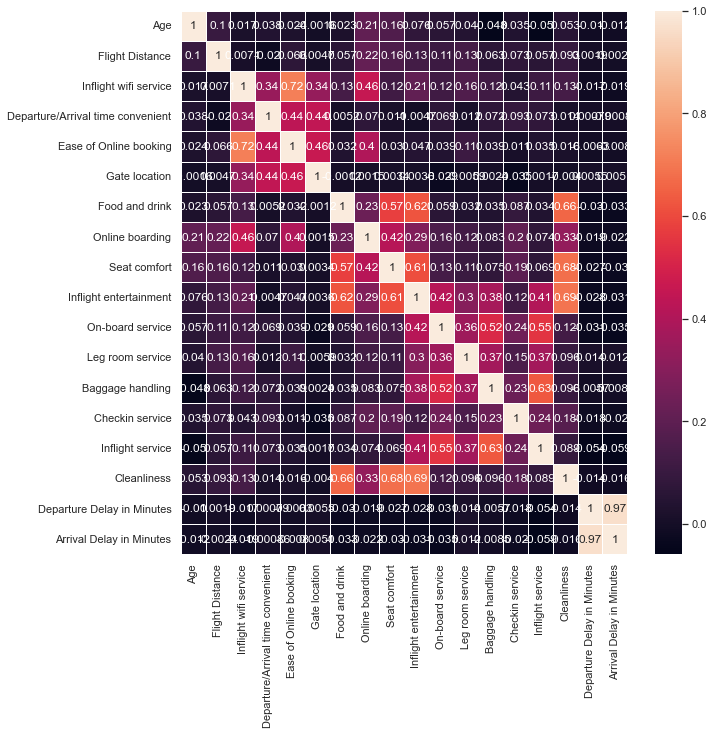

In [212]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True,linewidths=.5, fmt= '.2g',ax=ax)

#### Removing one feature from data out of two highly correlated features

In [213]:
train_data=train_data.drop(['Arrival Delay in Minutes'],axis=1)
test_data=test_data.drop(['Arrival Delay in Minutes'],axis=1)

### Checking for outliers in each numerical feature using boxplot visualization

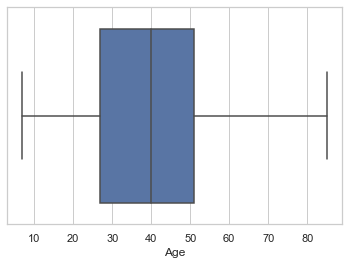

In [214]:
ax = sns.boxplot(x=train_data["Age"])

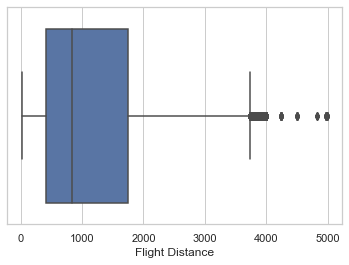

In [215]:
ax = sns.boxplot(x=train_data["Flight Distance"])

#### Removing outliers in 'Flight Distance' using 1.5*IQR rule

In [216]:
Q1 = np.percentile(train_data['Flight Distance'], 25,interpolation = 'midpoint')
Q3 = np.percentile(train_data['Flight Distance'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
train_data =  train_data[(train_data['Flight Distance']>= (Q1-1.5*IQR)) & (train_data['Flight Distance']<= (Q3+1.5*IQR))]

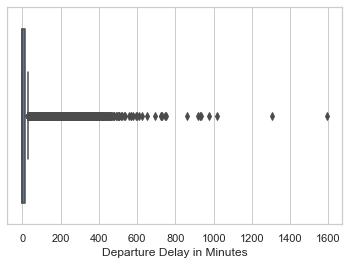

In [217]:
ax = sns.boxplot(x=train_data["Departure Delay in Minutes"])

#### Removing outliers in 'Departure Delay in Minutes' using 1.5*IQR rule

In [218]:
Q1 = np.percentile(train_data['Departure Delay in Minutes'], 25,interpolation = 'midpoint')
Q3 = np.percentile(train_data['Departure Delay in Minutes'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
train_data =  train_data[(train_data['Departure Delay in Minutes']>= (Q1-1.5*IQR)) & (train_data['Departure Delay in Minutes']<= (Q3+1.5*IQR))]

In [229]:
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,25
1,1,1,25,0,0,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,1
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,11
4,1,0,61,0,0,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,2,2,3,1,4,2,3,2,3
103900,1,0,49,0,0,2347,4,4,4,4,...,4,5,5,5,5,5,5,5,4,0
103901,1,1,30,0,0,1995,1,1,1,3,...,1,5,4,3,2,4,5,5,4,7
103902,0,1,22,0,1,1000,1,1,1,5,...,1,1,1,4,5,1,5,4,1,0


# Feature engineering

In [220]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


#### Since ML algorithms don't understand features containing textual values, hence we'll encode those type of features to integral values using Label Encoding technique

In [221]:
# list of features to be encoded
to_enc=['Gender','Customer Type','Type of Travel','Class','satisfaction']

In [222]:
for i in to_enc:
    le=preprocessing.LabelEncoder()
    le.fit(train_data[i])
    le.transform(train_data[i])
    train_data[i]=le.fit_transform(train_data[i])

In [223]:
for i in to_enc:
    le=preprocessing.LabelEncoder()
    le.fit(test_data[i])
    le.transform(test_data[i])
    test_data[i]=le.fit_transform(test_data[i])

In [224]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


# Model selection and evaluation

#### Preparing training and testing data

In [ ]:
y_true_train=train_data['satisfaction']
train_data=train_data.drop(['satisfaction'],axis=1)
y_true_test=test_data['satisfaction']
test_data=test_data.drop(['satisfaction'],axis=1)

### 1. Logistic Regression

In [225]:
train_data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,...,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000,87220.000000
mean,0.492295,0.186001,39.320156,0.317255,0.602786,1132.042135,2.740530,3.063942,2.758140,2.975247,...,3.443729,3.363070,3.392169,3.344359,3.634132,3.313449,3.656478,3.291126,3.716338,0.437732
std,0.499944,0.389110,15.159499,0.465410,0.620375,923.684745,1.334128,1.530193,1.400187,1.276511,...,1.319611,1.333891,1.285797,1.319017,1.184006,1.263202,1.172581,1.312261,7.055550,0.496110
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,406.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,817.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1670.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,3736.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,1.000000


#### Since features in data are each on a different scale hence we will normalize them using StandardScaler to improve performance of Logistic Regression which is a linear model

In [227]:
scaler_train = StandardScaler()
scaler_train.fit(train_data)
train_lr=scaler_train.transform(train_data)
scaler_test=StandardScaler()
scaler_test.fit(test_data)
test_lr=scaler_test.transform(test_data)

#### Using grid search cv to look for best parameters while minimising false positives by maximising precision

In [228]:
#set of parameters on which we will run Grid Search
parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'C':[0.5,0.6,0.8,1],'max_iter':[80,100]}

lr = LogisticRegression(random_state=0)
clf = GridSearchCV(lr, parameters,scoring=precision_score)
clf.fit(train_lr,y_true_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.5, 0.6, 0.8, 1], 'max_iter': [80, 100],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             scoring=<function precision_score at 0x0000016C6738DF70>)

#### Making predictions on best set of parameters that we got above

In [230]:
#predictions on training data
y_pred_train=clf.predict(train_lr)

#predictions on testing data
y_pred_test=clf.predict(test_lr)

#### Checking accuracy on train and test data, precision on test data and plotting confusion matrix to see false positives

training_accuracy: 0.8723801880302683
testing_accuracy: 0.8708531263275788
precision_on_test_data 0.8652217466533103


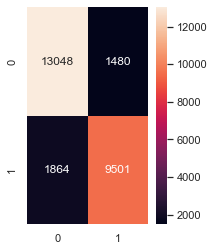

In [232]:
print('training_accuracy:',accuracy_score(y_true_train,y_pred_train))
print('testing_accuracy:',accuracy_score(y_true_test,y_pred_test))
print('precision_on_test_data',precision_score(y_true_test,y_pred_test))
cm = confusion_matrix(y_true_test,y_pred_test)
plt.subplot(1,2,2)
sns.heatmap(cm,annot=True,fmt="d");

#### Train and test accuracy are both equally high hence there is no overfitting

#### Now we will try Random Forest Classifier that works on ensemble learning for better predictions

### 2. Random forest classifier

#### Using grid search cv to look for best parameters while minimising false positives by maximising precision

In [234]:
#set of parameters on which we will run Grid Search
parameters = {'max_features':[15,20,24], 'n_estimators':[100,120,150]}

rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf, parameters,scoring=precision_score)
clf.fit(train_data,y_true_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_features': [15, 20, 24],
                         'n_estimators': [100, 120, 150]},
             scoring=<function precision_score at 0x0000016C6738DF70>)

#### Making predictions on best set of parameters that we got above

In [240]:
#predictions on training data
y_pred_train=clf.predict(train_data)

#predictions on testing data
y_pred_test=clf.predict(test_data)

#### Checking accuracy on train and test data, precision on test data and plotting confusion matrix to see false positives

training_accuracy: 1.0
testing_accuracy: 0.9633877882053065
precision_on_test_data 0.973026973026973


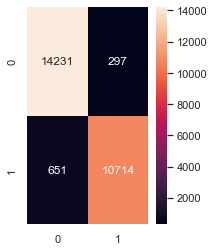

In [241]:
print('training_accuracy:',accuracy_score(y_true_train,y_pred_train))
print('testing_accuracy:',accuracy_score(y_true_test,y_pred_test))
print('precision_on_test_data',precision_score(y_true_test,y_pred_test))
cm = confusion_matrix(y_true_test,y_pred_test)
plt.subplot(1,2,2)
sns.heatmap(cm,annot=True,fmt="d");

#### Train and test accuracy are both equally high hence there is no overfitting

## As we can see Random Forest Classifier is performing better with ~97% precision score along with high accuracy score of ~97% hence this will be our final model